https://universe.roboflow.com/workenv-dayet/facial-emotion-dataset-7g1jd-hipbk

In [7]:
!nvidia-smi

Mon Aug 11 20:28:54 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   41C    P8             10W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

**Step 01 # Install the Ultralytics Package**

In [8]:
!pip install ultralytics

**Step 02 # Import All the Requried Libraries**

In [9]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 43.2/112.6 GB disk)


In [10]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [12]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="QVxnqMzrMbCU8kG44C0t")
project = rf.workspace("workenv-dayet").project("facial-emotion-dataset-7g1jd-hipbk")
version = project.version(3)
dataset = version.download("yolov11")



loading Roboflow workspace...
loading Roboflow project...


In [13]:
dataset.location

'/content/Facial-Emotion-Dataset--3'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [15]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="yolo11n.pt" epochs=10 imgsz=640

Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/Facial-Emotion-Dataset--3/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose

**Step # 05 Examine Training Results**

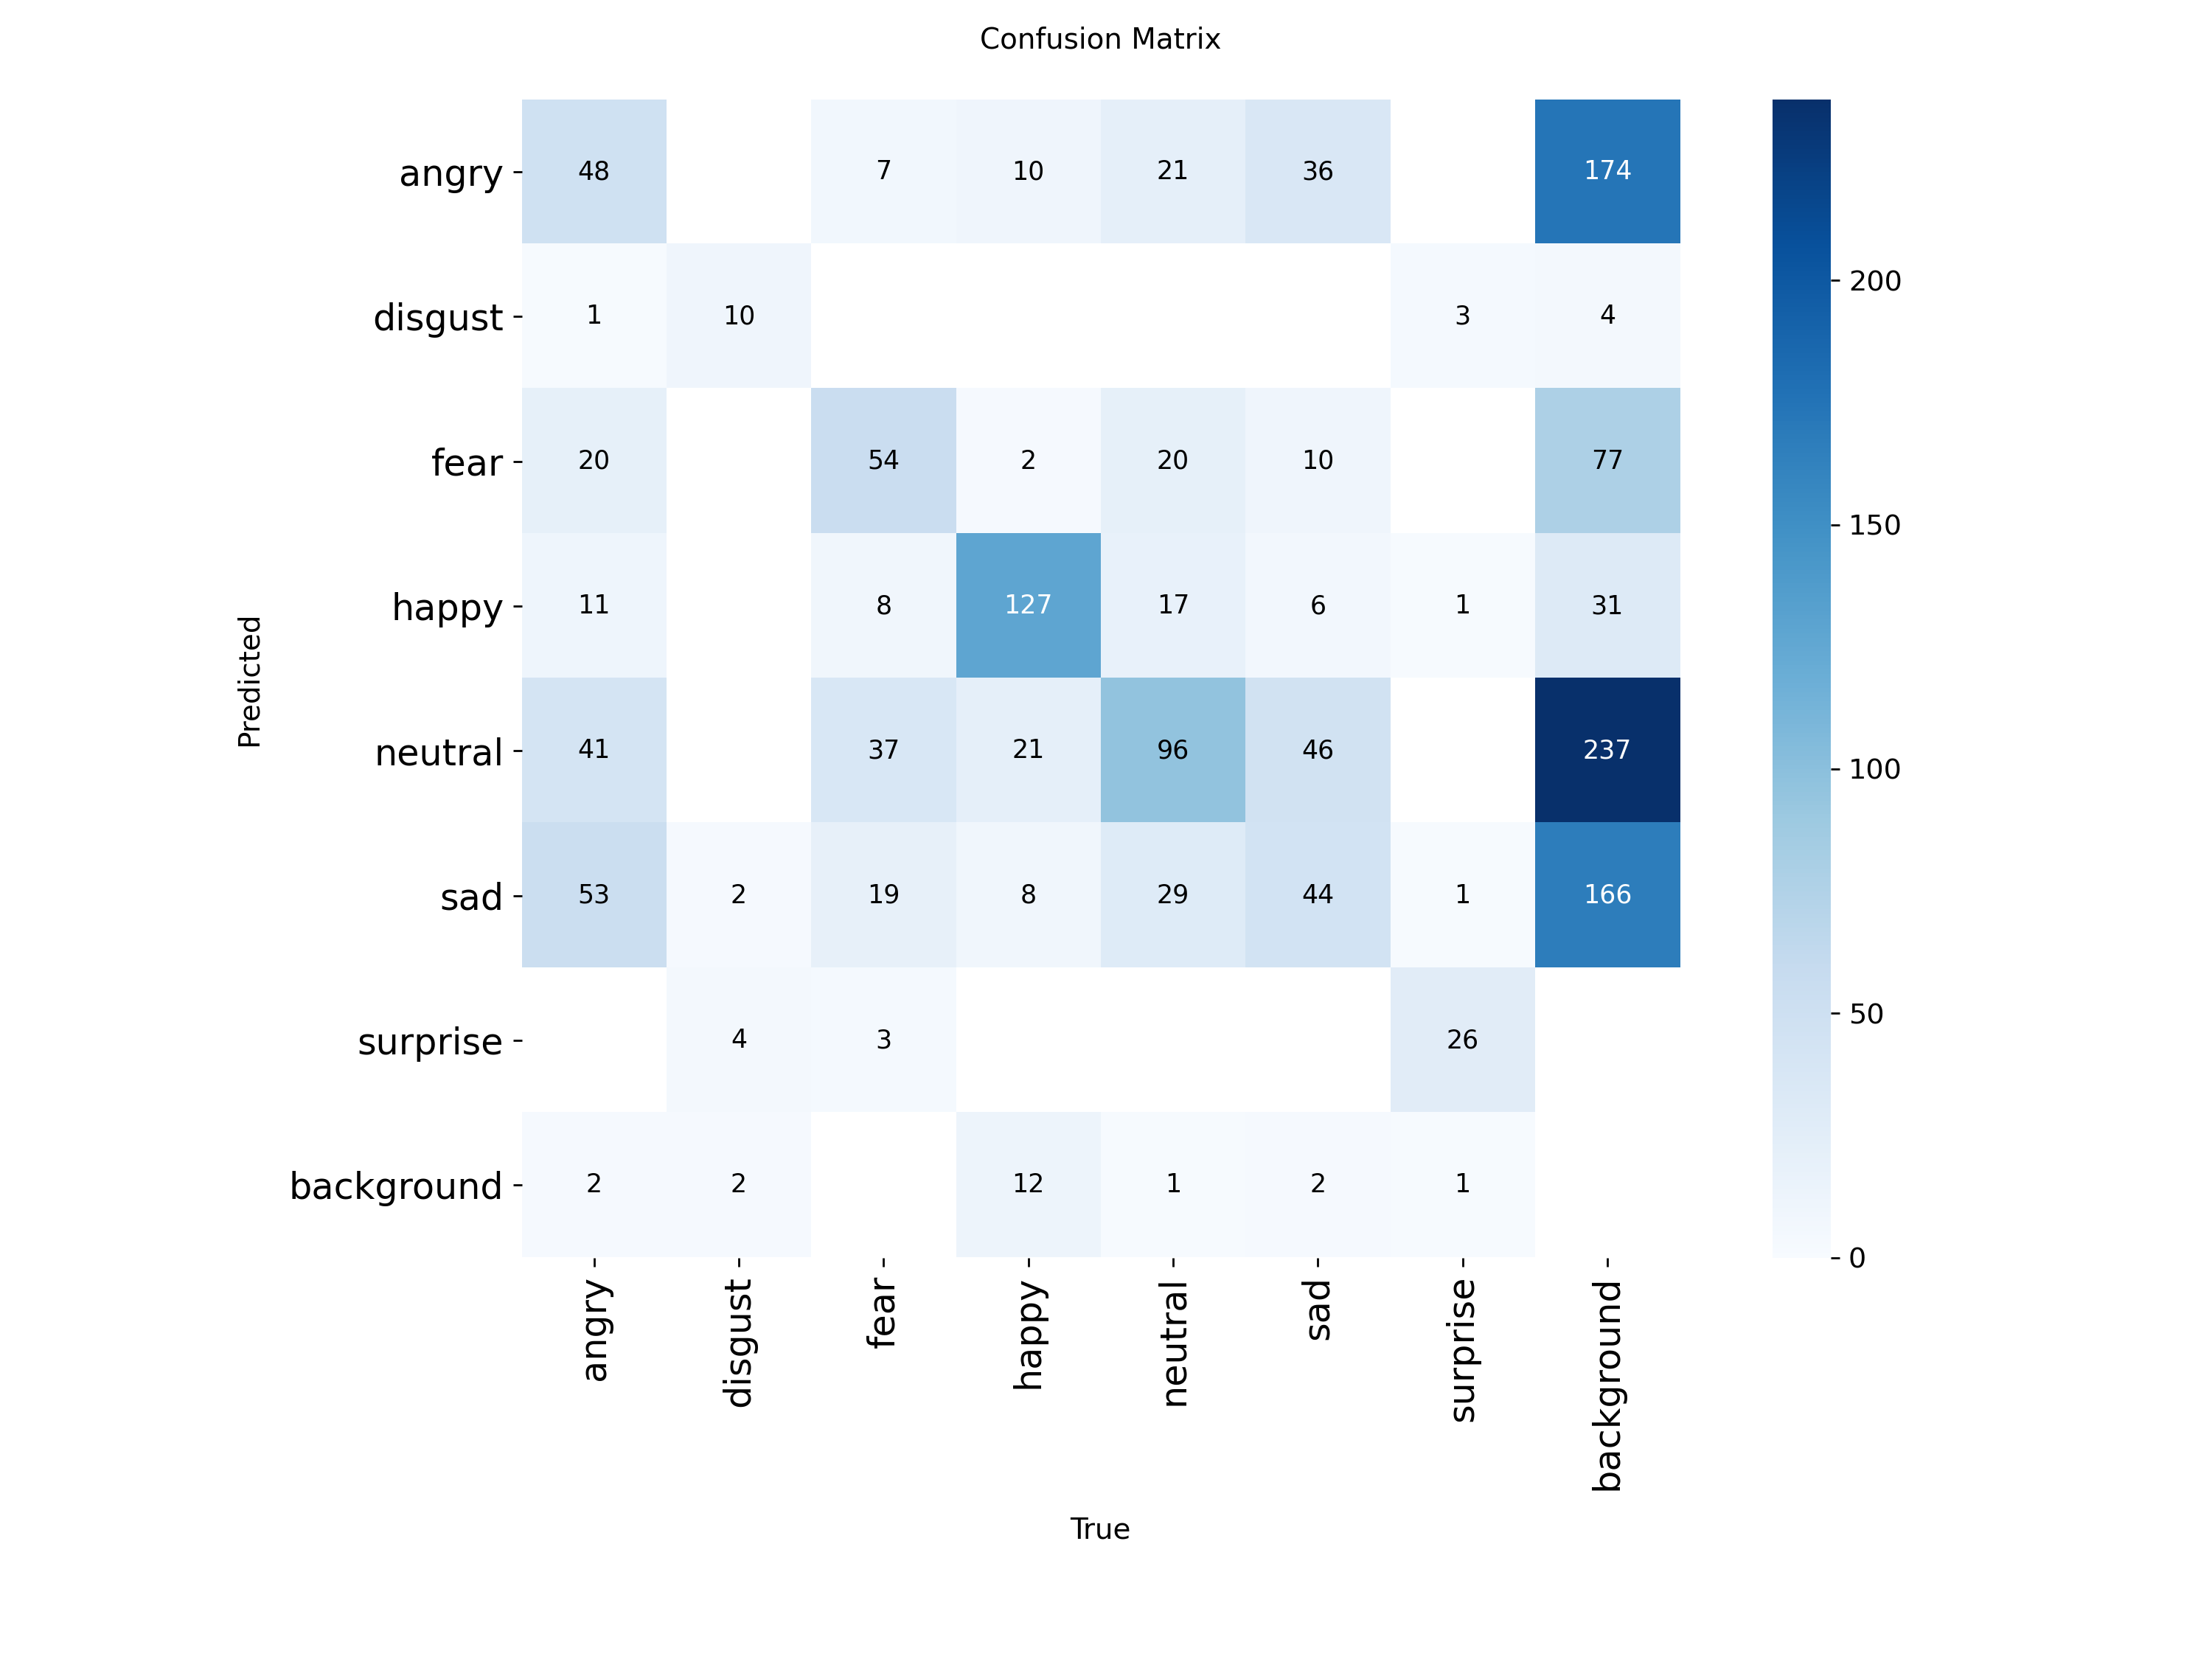

In [24]:
Image("/content/runs/detect/train2/confusion_matrix.png", width=600)

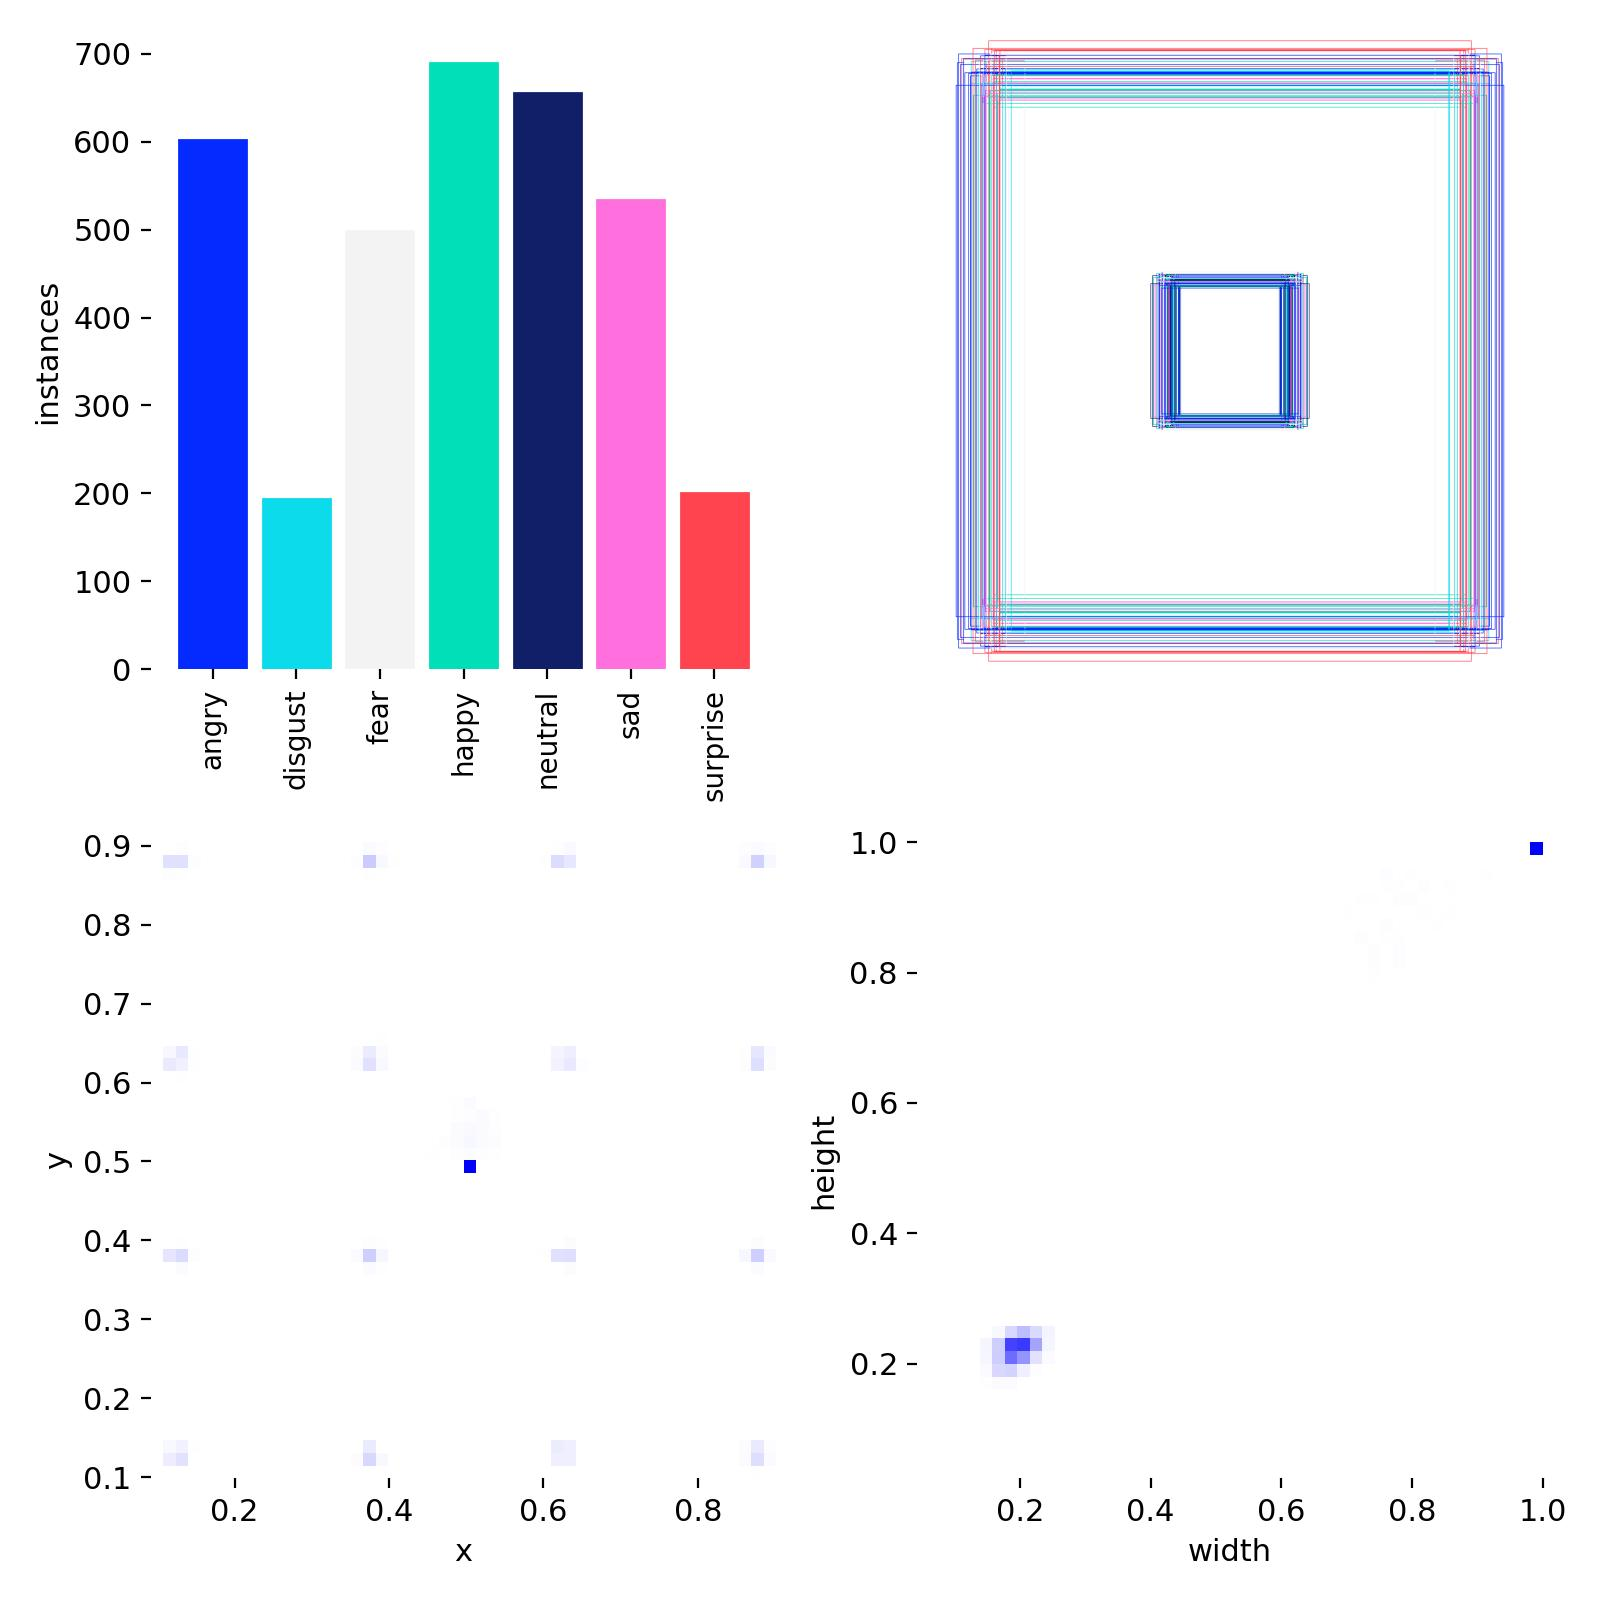

In [25]:
Image("/content/runs/detect/train2/labels.jpg", width=600)

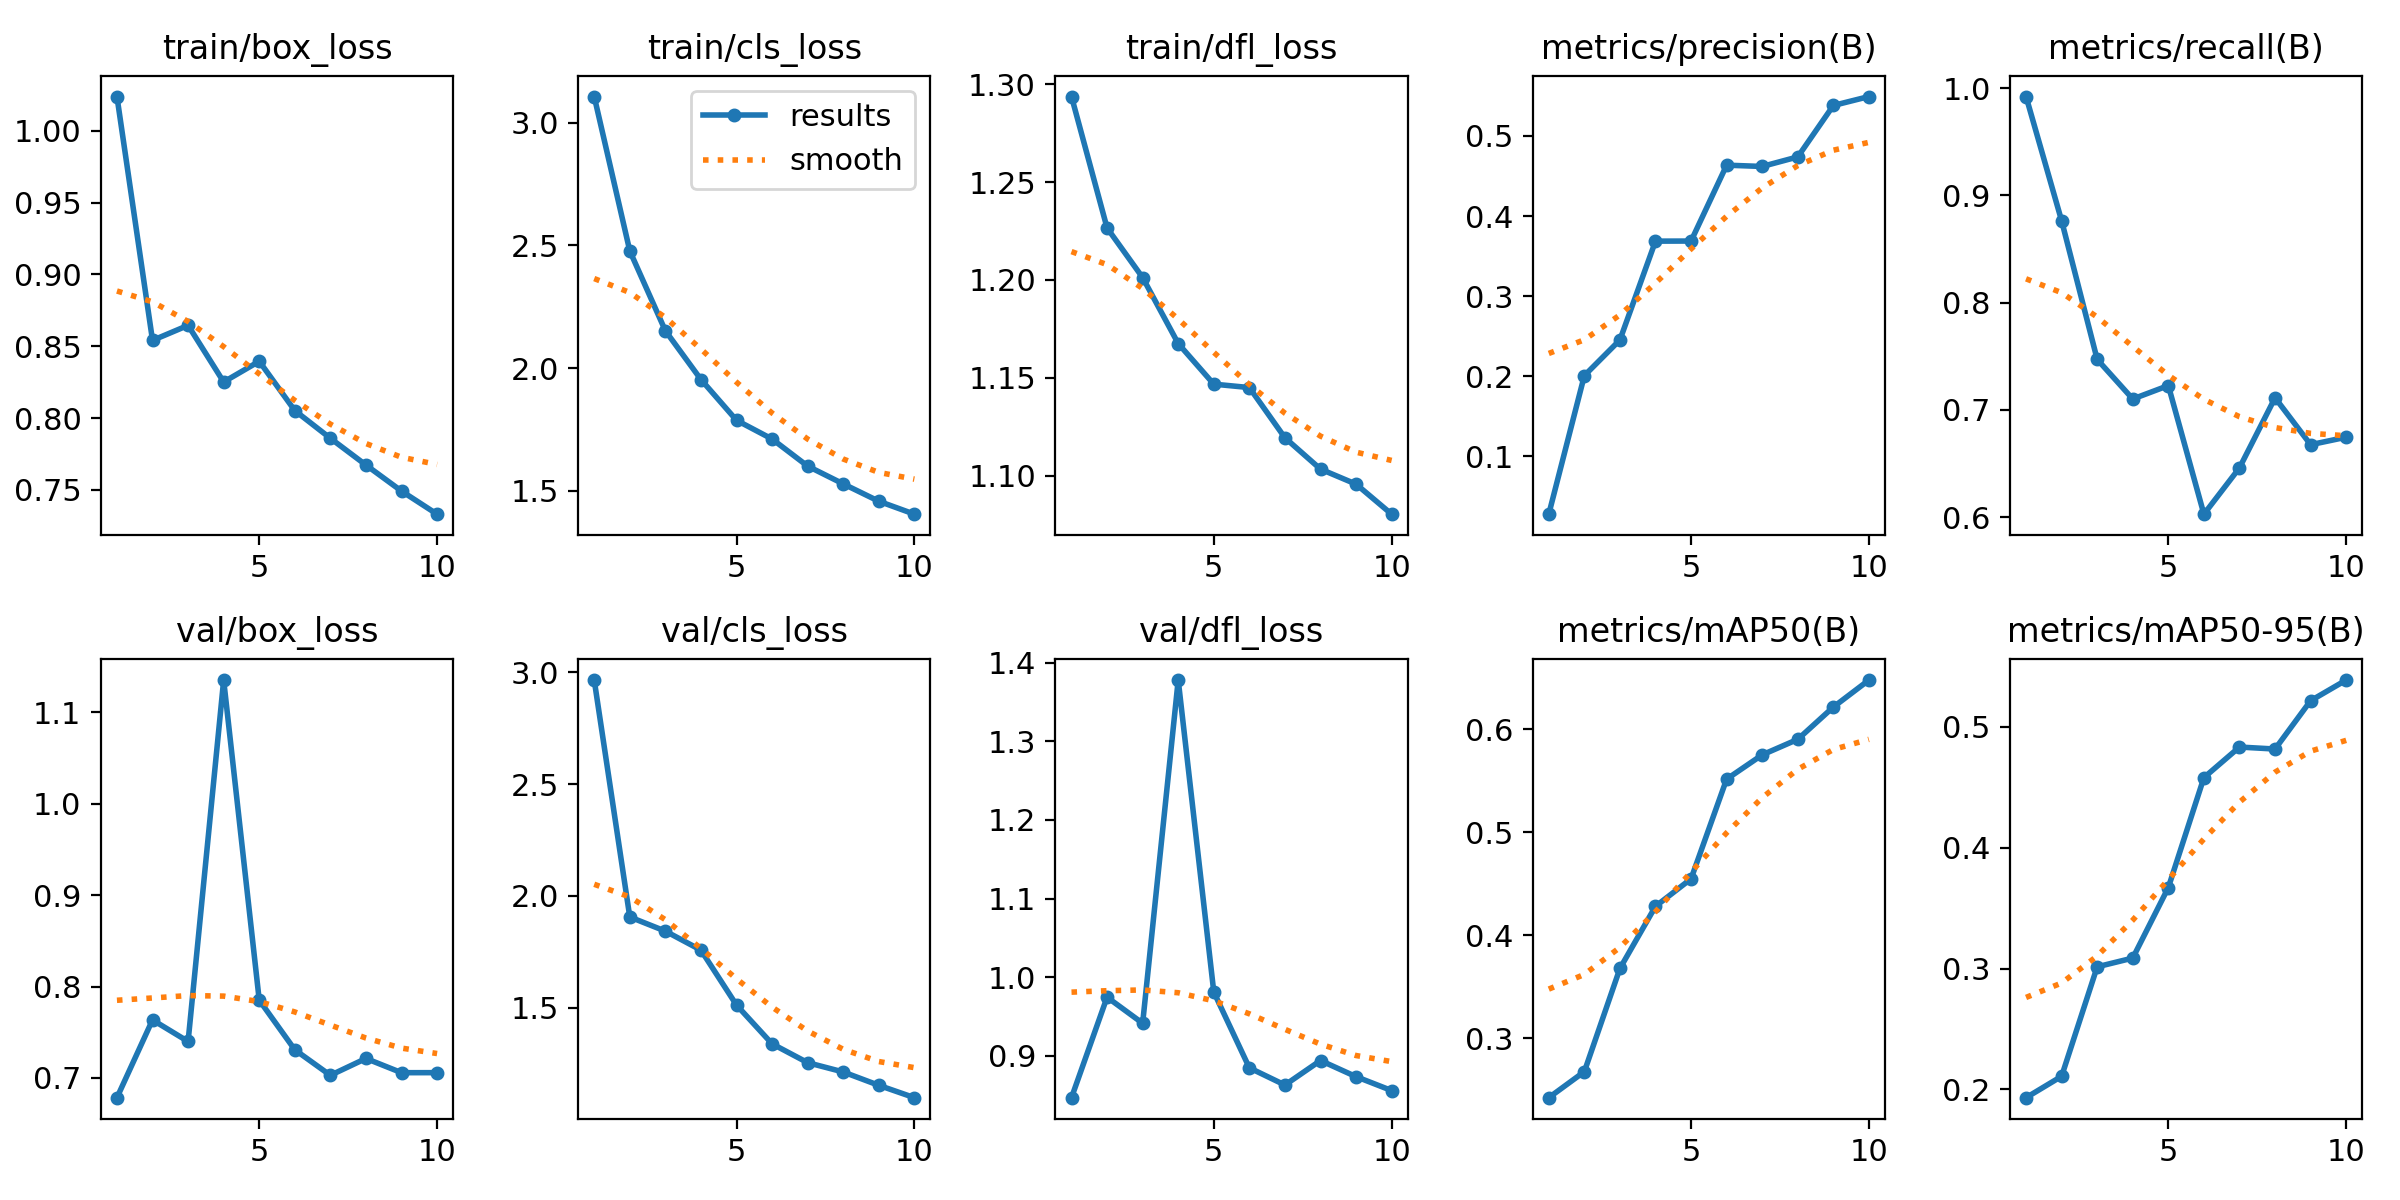

In [28]:
Image("/content/runs/detect/train2/results.png", width=600)

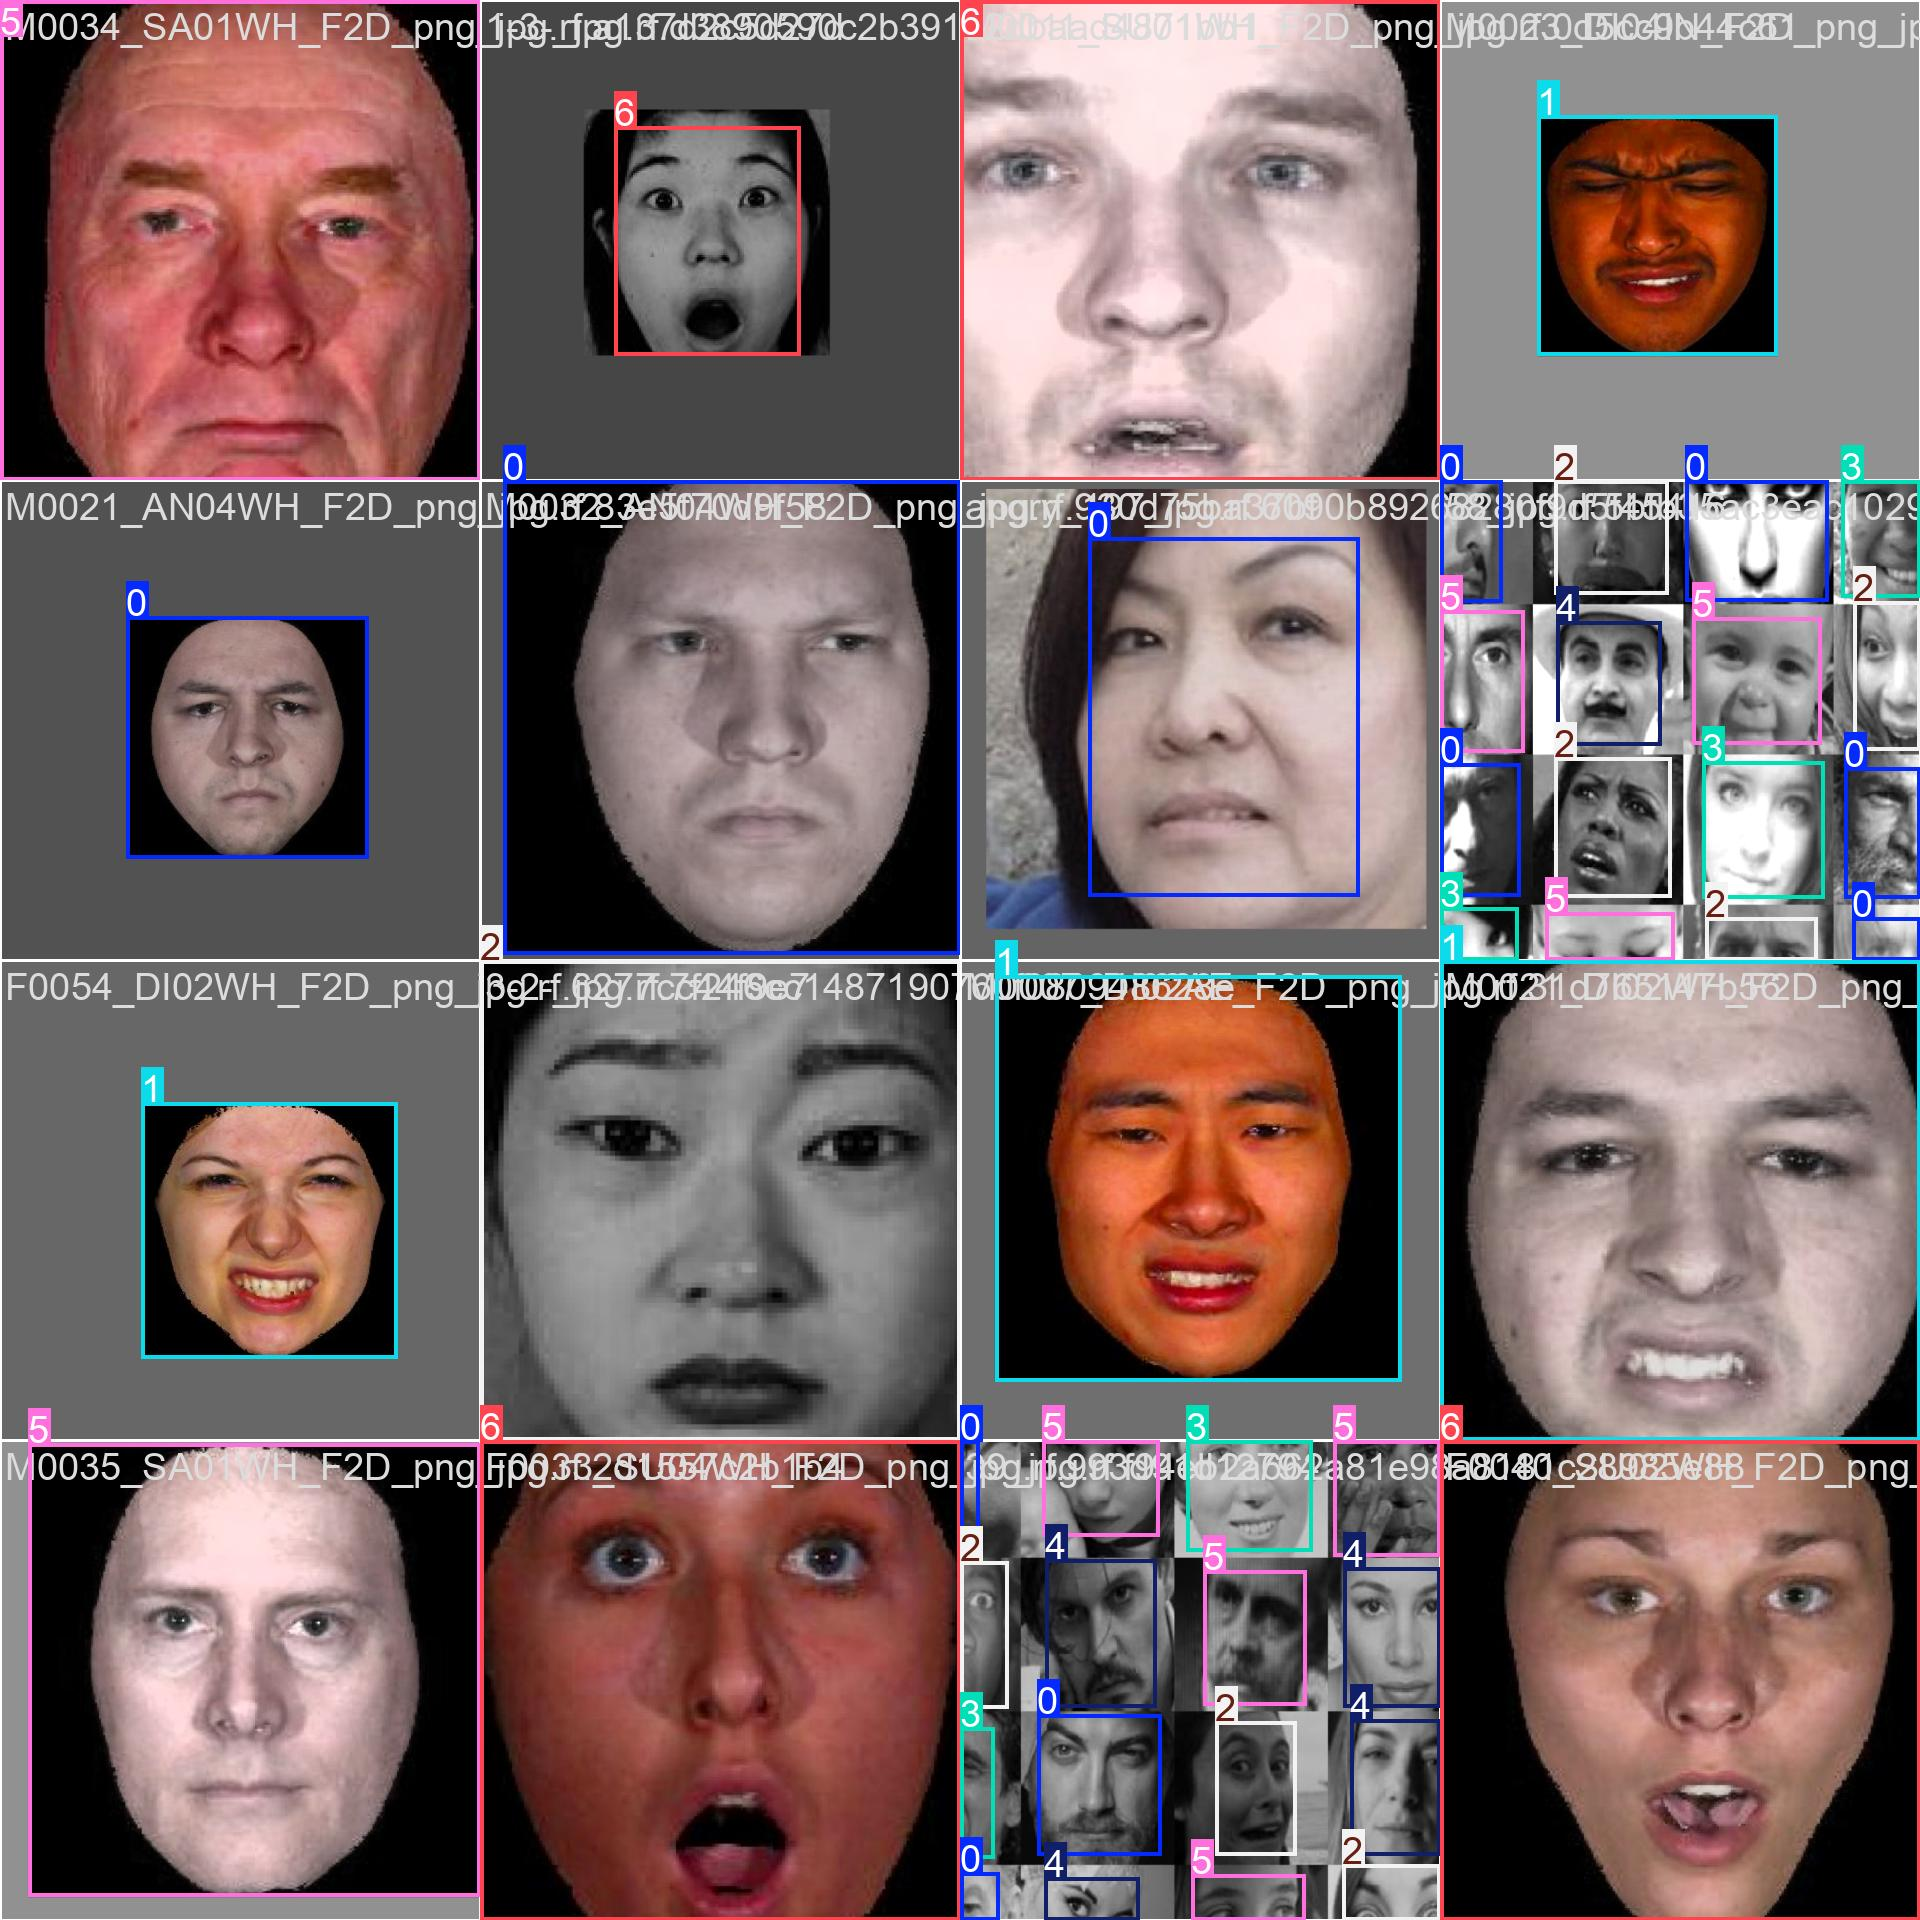

In [29]:
Image("/content/runs/detect/train2/train_batch0.jpg", width=600)

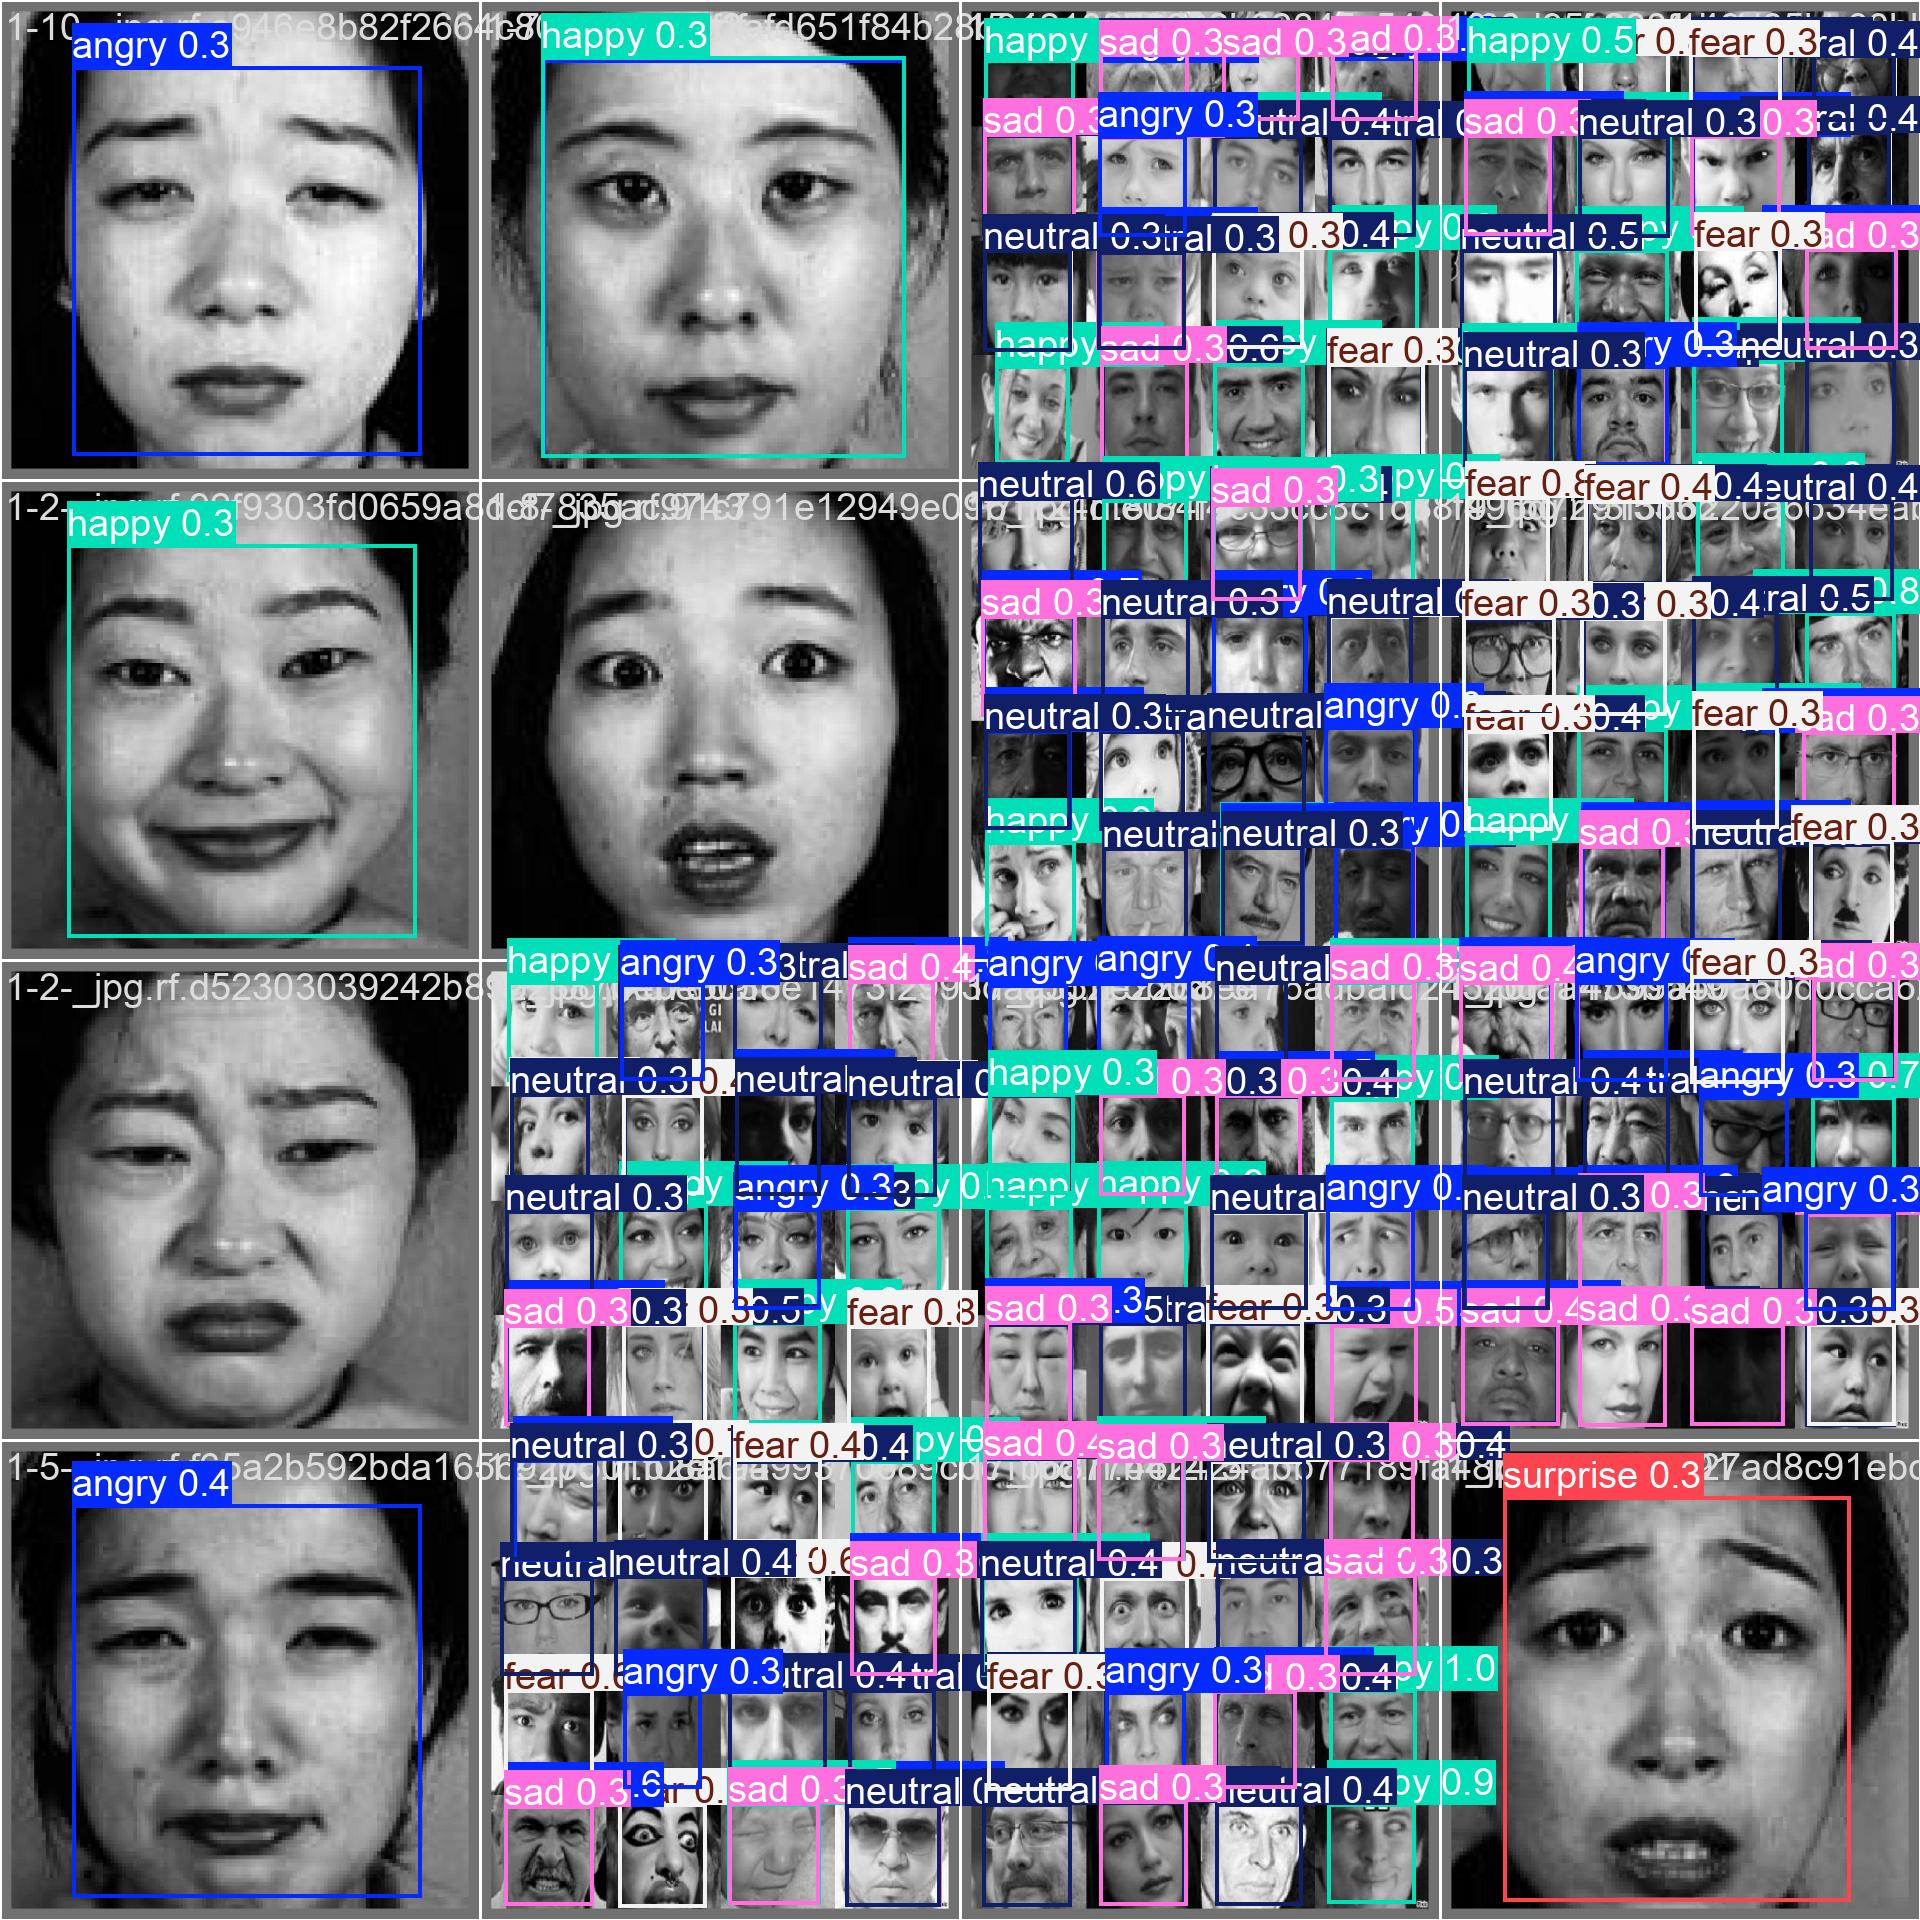

In [30]:
Image("/content/runs/detect/train2/val_batch0_pred.jpg", width=600)

**Step # 07  Validate Fine-Tuned Model**

In [35]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1369.5±429.9 MB/s, size: 30.7 KB)
val: Scanning /content/Facial-Emotion-Dataset--3/valid/labels.cache... 185 images, 0 backgrounds, 0 corrupt: 100% 185/185 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 12/12 [00:04<00:00,  2.65it/s]
                   all        185        862      0.684      0.748      0.777       0.65
                 angry         76        176      0.677      0.466      0.649      0.494
               disgust         18         18      0.841      0.889      0.935      0.918
                  fear         51        128      0.622      0.719      0.751      0.578
                 happy         64        180      0.774      0.833      0.868      0.634
               neutral         52       

**Step # 08 Inference with Custom Model on Images**

In [36]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.177 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,583,517 parameters, 0 gradients, 6.3 GFLOPs

image 1/99 /content/Facial-Emotion-Dataset--3/test/images/1-5-_jpg.rf.fedd78c04d11645905c4124fa52aaa17.jpg: 640x640 1 angry, 19.1ms
image 2/99 /content/Facial-Emotion-Dataset--3/test/images/1-7-_jpg.rf.e66429ccfa57cb2c03c5e06fe43e3a8b.jpg: 640x640 1 fear, 15.0ms
image 3/99 /content/Facial-Emotion-Dataset--3/test/images/1-8-_jpg.rf.d4579ef9e8b6ca750aa61bd65ff33b47.jpg: 640x640 1 happy, 13.8ms
image 4/99 /content/Facial-Emotion-Dataset--3/test/images/10_jpg.rf.ce00a096968d9ce9ceb0a85b39e601cb.jpg: 640x640 1 angry, 5 fears, 4 happys, 6 neutrals, 3 sads, 14.7ms
image 5/99 /content/Facial-Emotion-Dataset--3/test/images/14_jpg.rf.26f69d5d4bfeffe1665b1558c11f95e9.jpg: 640x640 1 angry, 7 fears, 1 happy, 7 neutrals, 2 sads, 15.5ms
image 6/99 /content/Facial-Emotion-Dataset--3/test/images/2-3-_jpg.rf.2d5cb265aa6d734ebfffb7612bb0386

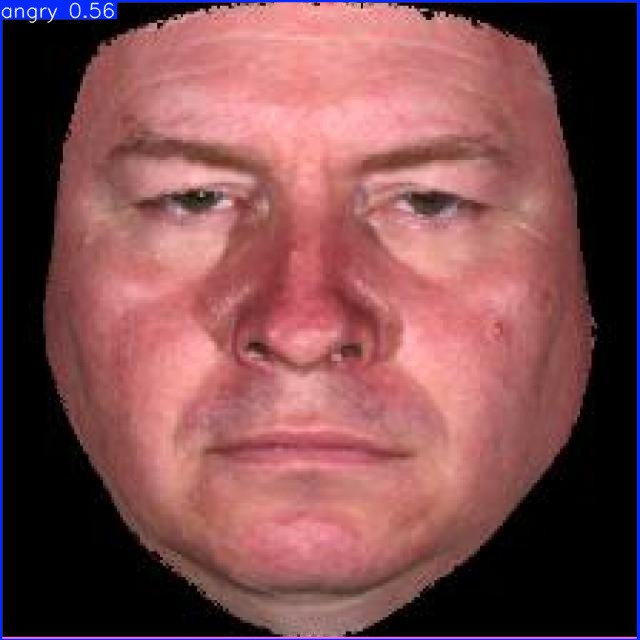

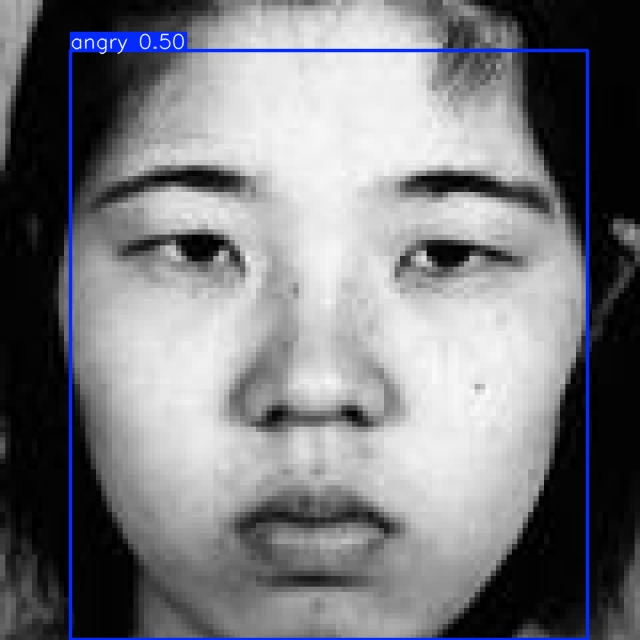

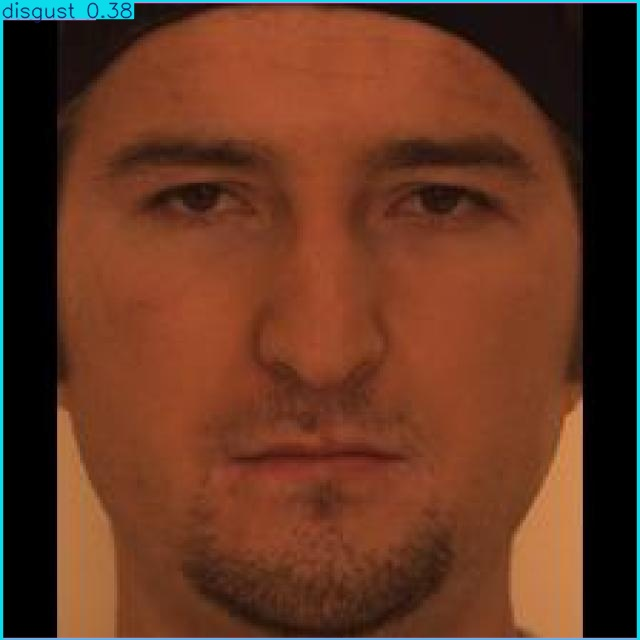

In [37]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict2*/'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")